In [121]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

# Question 1(a)

In [94]:
# Q1 (a)
# perceptron function below is the implementation of the algorithm described on slide 7 of Lecture 15 using the
# same notations.

def perceptron(x,y,learnig_rate,k):
    w= np.ones(len(x[0]))
    for i in range(k):
        # randomly picking up the points
        id = np.random.choice(range(0, len(x)))
        xn= x[id]
        yn= y[id]
        
        w= np.matrix.transpose(w)
        u = np.dot(w, xn)
        # w is getting updated only when the algo makes a mistake 
        if(yn* u < 0):
            w = w + yn*xn
        
    return w
        
    
    

# Question 1 (b)

In [172]:
## Q1 b

data =pd.read_csv('data_banknote_authentication.txt') 
data.head()
x= data.iloc[:,:-1].values
y= data.iloc[:,-1].values
for i in range(len(y)):
    if(y[i]==0):
        y[i]=-1

# fucntion to split the dataset into training set and the held out set (test set)
def split(x,y,ratio):
    xpos=[]
    ypos=[]
    xneg=[]
    yneg=[]
    for i in range(0,len(y)):
        if(y[i]==1):
            xpos.append(x[i])
            ypos.append(y[i])
        else:
            xneg.append(x[i])
            yneg.append(y[i])
    x_train=[]
    y_train=[]
    x_test=[]
    y_test=[]
    num= int(len(x)*ratio)
    #taken a fixed ratio to ensure the variability of data in the both the sets
    # divinding into 47(-) and 53(+) of positive and negative data value 
    nump= int(num*0.53)
    numn= num-nump
    index = np.random.permutation(len(xpos))
    
    shuffled_datax=[]
    shuffled_datay=[]
    for i in index:
        shuffled_datax.append( xpos[i])
        shuffled_datay.append(ypos[i])
        
    x_test= shuffled_datax[:nump]
    y_test= shuffled_datay[:nump]
    
    x_train= shuffled_datax[nump:len(xpos)]
    y_train= shuffled_datay[nump:len(xpos)]
    # traing data and test data
    index = np.random.permutation(len(xneg))
    j=0
    shuffled_datax=[]*len(xneg)
    shuffled_datay=[]*len(yneg)
    for i in index:
        shuffled_datax.append(xneg[i])
        shuffled_datay.append(yneg[i])
        j+=1
    x_test+= shuffled_datax[:numn]
    y_test+= shuffled_datay[:numn]
    
    x_train+= shuffled_datax[nump:len(xneg)]
    y_train+= shuffled_datay[nump:len(xneg)]   
    return x_train,y_train,x_test,y_test
    
# fucntion to make the prediction using the prediction fuction defined above 
# the fucntion takes the input as x and calculated w using the preceptron function defined above

def prediction(x,w):
    y= np.matmul(x,np.matrix.transpose(w))
    return y



    
    





# Question 1 (c)

In [173]:
# Q1 c

# training the algorithm on the dataset using cross-validation
#splitting the data
# the test set i used here will bascally be held out for all the future calcution as will use this to predict the final error

x_train,y_train,x_test,y_test=split(x,y,0.25)
w = perceptron(x_train,y_train,0.01,100)
y_pred = prediction(x_test,w)

#cross validation set
x_train1,y_train1,x_validation,y_validation=split(x_train,y_train,0.25)
# for different k values we will train the and check the error 
k_values=[]
test_errors=[]
for i in range(10,100,10):
    w= perceptron(x_train1,y_train1,0.01,i)
    y_pred = prediction (x_validation,w)
    error=0
    for j in range(len(y_pred)):
        if(y_pred[j]* y_validation[j]<0):
            error+=1
    test_error= (error/len(y_pred))*100
    k_values.append(i)
    test_errors.append(test_error)
# the k value with minimum error will be used as optimal k and used furthur for predictions.    
min_index=test_errors.index(min(test_errors))
print("The optimal k:")
print(k_values[min_index])
print(test_errors[min_index])

#optimal w
# the optimal k value found above is now used to calculate the best w we can get from this
k_opt= k_values[min_index]
w= perceptron(x_train,y_train,0.01,k_opt)
print("w value for the optmial k")
print(w)
#test_set error for optimal k
y_pred = prediction (x_test,w)
error=0
# the held out set (test_set) is used for the furthur predictions and reposting the test set error for that.
for j in range(len(y_pred)):
    if(y_pred[j]* y_test[j]<0):
            error+=1
test_set_error=(error/len(y_pred))*100
# 
print(test_set_error)

    
    
    
    

The optimal k:
90
6.349206349206349
w value for the optmial k
[-13.63282  -8.74242 -11.31949  -5.15036]
9.649122807017543


# Question 1 (d)

In [116]:
#Q1 d
# F1 score 

#doing prediction using best model on the held out set
w= perceptron(x_train,y_train,0.01,k_opt)
y_pred = prediction (x_test,w)

#and the real output is y_test

# tp is the true positive value 
# fn is the false negative value
# fp is the false positive value
# tn is the true negative value
tp=0
fn=0
fp=0
tn=0
for i in range(len(y_pred)):
    if(y_pred[i]>0 and y_test[i]>0):
        tp+=1
    if(y_pred[i]<0 and y_test[i]>0):
        fn+=1
    if(y_pred[i]>0 and y_test[i]<0):
        fp+=1
    if(y_pred[i]>0 and y_test[i]<0):
        tn+=1

#precision and recall
p= tp/(tp+fp)
r= tp/(tp+fn)
# calcuating F1 score using the formulae below
F1_score= 2*p*r/(p+r)
print("F1 score is:")
print(F1_score)
    



F1 score is:
0.9070422535211268


# Question 2 (a)

In [167]:
##Q2 (a)

For the prior distribution

From a normal likelihood distribution,  
$$ {\mu} = mean of the data $$
$$  \hat{\sigma}_1^2 = \hat{\sigma}_1^2 of x / {sqrt}50 $$

for the prior distribution,
$$ mean = 25 $$
$$ sd = 5 $$

we have likelihood distribution as,

$$p({y}/{\mu})=\frac{1}{\sqrt{2\pi\sigma_l^2}}\exp\left\{\frac{-(\bar y-\mu)^2}{2\sigma_l^2}\right\}.$$

4.954534334158836


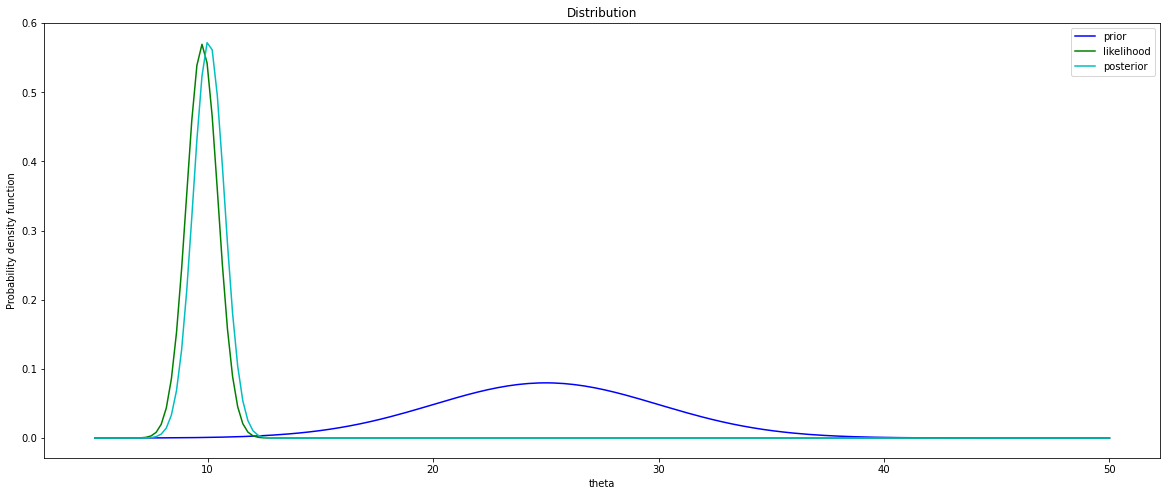

In [169]:
# Q2 (a)
#given mean = 10 and sd =5 
x = np.random.normal(loc=10, scale=5, size=50)
mean_x= np.mean(x)
dd= [(i - mean_x)**2 for i in x]
sd_x = np.sqrt(sum(dd) / 50)
print(sd_x)
# calcuating mean and sd for each of the distribution
# for likelihood

mean_likelihood = mean_x
sd_likelihood= sd_x/(np.sqrt(50))

# for the prior

mean_prior= 25
sd_prior= 5

# for the posterior distribution 
 
sd_posterior= np.sqrt((((sd_x)**2)*((sd_prior)**2))/ (((sd_x)**2)+ (((sd_prior)**2)*50) ))
mean_posterior = ((sd_posterior**2)* ((mean_prior*(sd_x**2))+ (50 * mean_x * ((sd_prior)**2)))/(((sd_x)**2)*((sd_prior)**2)))

def normal_pdf(x,mean,sd ):
    var = float(sd)**2
    d = (2*math.pi*var)**(.5)
    num = np.exp(-(float(x)-float(mean))**2/(2*var))
    return num/d
likeprob=[]
postprob=[]
priorprob=[]
X= np.linspace(5,50,200)
for i in range(len(X)):
    likeprob.append(normal_pdf(X[i],mean_likelihood,sd_likelihood))
    postprob.append(normal_pdf(X[i],mean_posterior,sd_posterior))
    priorprob.append(normal_pdf(X[i],mean_prior,sd_prior))
    
plt.figure(figsize=(20,8))
plt.title("Distribution")
plt.xlabel("theta")
plt.ylabel("Probability density function")
plt.plot(X,priorprob,'-b',label='prior')
plt.plot(X,likeprob,'g',label='likelihood')
plt.plot(X,postprob,'c',label='posterior')
plt.legend()
plt.show()


# Question 2(b)

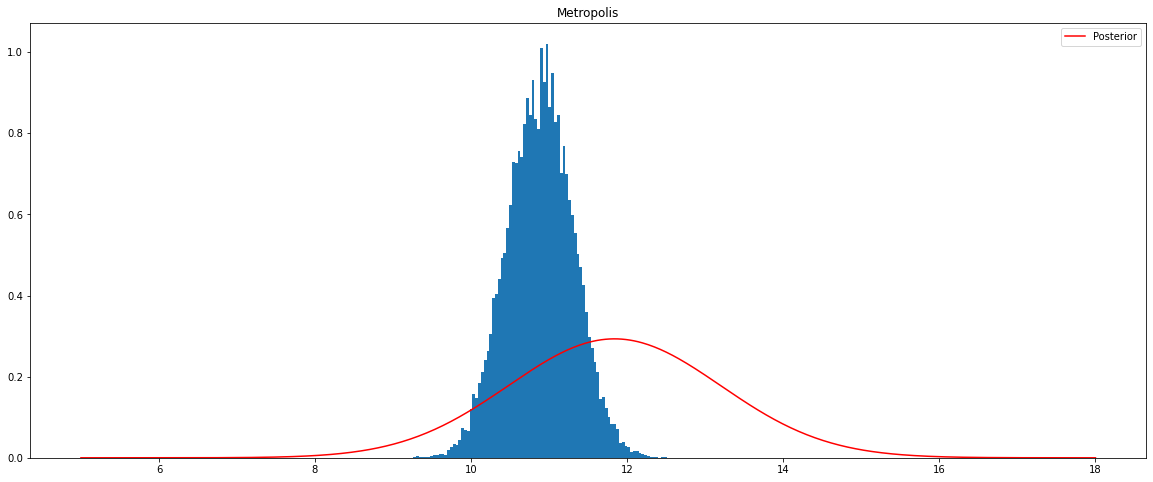

In [168]:
# Q2(b)
def get_likelihood(x,mu,sigma):
    p=1
    for i in x:
        p*= normal_pdf(i , mu,sigma)
    return p
def get_prior(candidate,mu,sigma):
    return normal_pdf(candidate,mu,sigma)
#used this fucnction to calcualte the normal distribution value of evey x
def normal(x,mean,sd):
    p=[]
    for i in x:
        p.append( normal_pdf(i,mean,sd))
    return p
# for calcualtion of the posterior 
def cal_posterior(mean_x,s, mean_prior,sd_prior,x):
    sd_x= 10
    sd_posterior= np.sqrt((((sd_x)**2)*((sd_prior)**2))/ (((sd_x)**2)+ (((sd_prior)**2)*50) ))
    mean_posterior = ((sd_posterior**2)* ((mean_prior*(sd_x**2))+ (50 * mean_x * ((sd_prior)**2)))/(((sd_x)**2)*((sd_prior)**2)))
    return mean_posterior,sd_posterior

# calculating the prob of histogram    
def  Metropolis(x,n= 200000, sigma= 5):
    samp=[5]
    theta_curr= 5
    flag= False
    mu_p=25
    sigma_p= 5
    post_curr= get_prior(samp[-1],mu_p,sigma_p)* get_likelihood(x,samp[-1],sigma)
    for i in range(n):
        # we use mean as theta and std
        theta_candidate= np.random.normal(samp[-1],sigma)
        #new likelihood and prior
        prior_new= get_prior(theta_candidate,mu_p,sigma_p)
        likelihood_new = get_likelihood(x, theta_candidate, sigma)
        
        candiate_posterior= likelihood_new * prior_new
        #if ratio >1 it is accepted 
        r=candiate_posterior/ post_curr
        if np.random.random()< r:
            samp.append(theta_candidate)
            post_curr= candiate_posterior
        else:
            samp.append(samp[-1])
            
        if(len(samp)== 2500 and flag== False):
            samp= samp[2000:]
            flag= True
            
    return samp

s= 3
m= 10
x=[]
for i in range(50):
    x.append(np.random.normal(loc= m,scale=s))
x= np.array(x)
mu_like= np.mean(x)
mu_post,std_post= cal_posterior(mu_like,s,mean_prior,sd_prior,x)
sample= Metropolis(x,sigma=s)

x_pt= np.linspace(5,18,500)
plt.figure(figsize=(20,8))
plt.hist(sample,bins=100,density = True )
plt.plot(x_pt,normal(x_pt,mu_post,std_post),label='Posterior',color='r')
plt.legend()
plt.title('Metropolis')
plt.show()
    

In [ ]:
#Q2 (c)


